### Στοιχεία ομάδας (Ομάδα 1):

```
Neural Networks - Lab 1
Creators : 
Αναστάσης Αγγλογάλλος
Παναγιώτης Κοκκινάκης
Νικόλας Μπέλλος
```

# Μέρος 1. UCI dataset

# Εισαγωγή και Επισκόπηση:

Το Dataset που χρησιμοποιήσαμε είναι το HCC Survival Data Set. Πρόκειται για δεδομένα ασθενών που πάσχουν από Υπατοκυτταρικό Καρκίνωμα τα οποία συλλέχθησαν στο University Hospital στην Πορτογαλία. Το Dataset περιλαμβάνει 49 διαφορετικά χαρακτηριστικά από 165 ασθενείς, ενώ στα δεδομένα δεν περιέχονται επικεφαλίδες ή αρίθμηση γραμμών. Από τα 49 χαρακτηριστικά τα 26 είναι ποιοτικά και τα 23 ποσοτικά. Τα απουσιάζοντα δεδομένα αποτελούν το 10.22% του συνολικού Dataset, ενώ μόνο 4/165 ασθενείς έχουν πληροφορίες σε όλα τα πεδία. Κύριος στόχος είναι η εξάλειψη συμπερασμάτων για το αν ο ασθενής επιβίωσε έναν χρόνο μετά τη διάγνωση, χαρακτηριστικό που κωδικοποιείται με 1 (έζησε) ή 0 (απεβίωσε) ενώ οι ετικέτες κλάσης βρίσκονται στην τελευταία στήλη. Οι δύο κλάσεις (έζησε-απεβίωσε) εμφανίζονται σε ποσοστά 38.18% και 61.82% αντίστοιχα. Επομένως υπάρχει class imbalance αφού η μία κλάση είναι τουλάχιστον 1.5 φορές πιο συχνά εμφανιζόμενη από την άλλη. 


# 1. Προετοιμασία


In [ ]:
!pip install --upgrade pip 
!pip install --upgrade scikit-learn 
!pip install --upgrade numpy 
!pip install --upgrade scipy 
!pip install --upgrade pandas
!pip install optuna 
!pip install -U imbalanced-learn
!pip install -U ray 
!pip install -U ray[tune]
!pip install -U tune-sklearn
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 13.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hcc-data.txt to hcc-data.txt


## Split Data Set (train, test)

In [150]:
import pandas as pd
import numpy as np
from numpy.random import RandomState

# Print arrray inline
pd.set_option('expand_frame_repr', False)

all_data = pd.read_csv("/content/hcc-data.txt", header=None)
print(all_data)
print("--------------------------------------------")

# Split dataset into TRAIN SET and TEST SET

#rng = RandomState()
#train_set = all_data.sample(frac=0.7, random_state=rng)
train_set = all_data.sample(frac=0.7, random_state=42)
test_set = all_data.loc[~all_data.index.isin(train_set.index)]

print("Entire Data Set (size) : " + str(all_data.shape))
print("Train Set (size) : " + str(train_set.shape))
print("Test Set (size) : " + str(test_set.shape))

     0  1   2  3  4  5  6   7  8  9   ...   40   41    42 43    44    45  46  47  48 49
0     1  0   1  0  0  0  0   1  0  1  ...  150  7.1   0.7  1   3.5   0.5   ?   ?   ?  1
1     0  ?   0  0  0  0  1   1  ?  ?  ...    ?    ?     ?  1   1.8     ?   ?   ?   ?  1
2     1  0   1  1  0  1  0   1  0  1  ...  109    7   2.1  5    13   0.1  28   6  16  1
3     1  1   1  0  0  0  0   1  0  1  ...  174  8.1  1.11  2  15.7   0.2   ?   ?   ?  0
4     1  1   1  1  0  1  0   1  0  1  ...  109  6.9   1.8  1     9     ?  59  15  22  1
..   .. ..  .. .. .. .. ..  .. .. ..  ...  ...  ...   ... ..   ...   ...  ..  ..  .. ..
160   0  0   1  ?  ?  ?  1   1  0  1  ...  109  7.6   0.7  5     3     ?   ?   ?   ?  1
161   0  1   0  ?  ?  ?  ?   1  0  0  ...  280  6.7   0.7  1   2.2   2.3   ?   ?   ?  0
162   1  0   1  0  0  0  0   1  0  1  ...  181  7.5  1.46  5  18.6     ?   ?   ?   ?  1
163   1  0   1  1  0  1  1   1  1  1  ...  170  8.4  0.74  5    18     ?   ?   ?   ?  0
164   1  1   1  0  0  0  1   1  

## Handle missing values

**Αιτιολόγηση για διαχείρηση των missing values**

Χρησιμοποιούμε δύο διαφορετικές μεθόδους για να διαχειριστούμε με τον ίδιο τρόπο τις τιμές που λείπουν.
1. Για το train Θα πρέπει για τις ποιοτικές τιμές να υπολογίσουμε την πιο συχνή ενώ για τις ποσοτικές να υπολογίσουμε τον μέσο όρο τους
2. Θα εφαρμόσουμε τις τιμές αυτές (ποιοτικές, ποσοτικές) σε όλα missing values τόσο του train set όσο και του test set.

In [151]:
from sklearn.impute import SimpleImputer

# replace ? with NaN
train_set.replace('?',np.NaN,inplace=True)
test_set.replace('?',np.NaN,inplace=True)

# mark which columns contain qualitative data
quant_columns = np.concatenate((np.arange(0, 23), np.arange(26,29))) #ex. {0, 1, 2}

# replace NaN values with the mean of the each column
imputer_mean = SimpleImputer(missing_values=np.NaN,strategy='mean')
imputer_most_frequent = SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
imputer_median = SimpleImputer(missing_values=np.NaN,strategy='median')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [152]:
# Apply imputer to train set
train_set_new = pd.DataFrame(imputer_mean.fit_transform(train_set))
train_set_new = np.round(train_set_new, decimals=2) #round them up

# round qualitive numbers
train_set_rows = np.shape(train_set)[0]
train_set_columns = np.shape(train_set)[1]
for i in range (train_set_rows):
  for j in range (train_set_columns):
    if (j in quant_columns):
      train_set_new[j][i] = np.round(train_set_new[j][i], decimals=0)

# PRINT TRAIN SET
print("TRAIN SET (OLD - NEW)")
print(train_set)
print(train_set_new)

TRAIN SET (OLD - NEW)
     0  1   2    3    4    5    6   7  8    9   ...   40   41    42   43    44   45   46   47   48 49
135   0  1   0    0    0    0    0   1  0    0  ...  123  6.8  0.82    5   8.3  NaN  NaN  NaN  NaN  1
115   1  1   1    0  NaN  NaN    0   1  0    1  ...  629  8.4  0.71    5   9.1  0.3  NaN  NaN  NaN  1
131   0  0   1  NaN  NaN  NaN    0   1  0  NaN  ...  147  6.5     1    5   2.6  3.8  NaN  NaN  NaN  1
55    0  1   0  NaN  NaN  NaN    1   0  0    0  ...  923  5.4  1.31    3  15.4  NaN  NaN  NaN  NaN  0
95    1  0   0    0    0    0    0   0  0    0  ...  124  6.8   1.6    1   5.5  NaN   15    7  810  0
..   .. ..  ..  ...  ...  ...  ...  .. ..  ...  ...  ...  ...   ...  ...   ...  ...  ...  ...  ... ..
46    0  1   0    0    0    0    0   0  0    0  ...  NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  1
7     1  1   1    0  NaN    0    0   1  0    1  ...  300  7.1  0.52    2     9  1.3   42   25  706  0
43    1  0   1  NaN  NaN  NaN  NaN   1  0  NaN  ...   56  7.

In [ ]:
# Apply imputer to test set
test_set_new = pd.DataFrame(imputer_mean.transform(test_set.values))
test_set_new = np.round(test_set_new, decimals=2) #round them up

# round qualitive numbers
test_set_rows = np.shape(test_set)[0]
test_set_columns = np.shape(test_set)[1]
for i in range (test_set_rows):
  for j in range (test_set_columns):
    if (j in quant_columns):
      test_set_new[j][i] = np.round(test_set_new[j][i], decimals=0)

# PRINT TEST SET
print("TEST SET (OLD - NEW)")
print(test_set)
print(test_set_new)

TEST SET (OLD - NEW)
     0    1   2    3    4    5    6   7    8    9   ...    40   41    42   43    44    45   46    47    48 49
0     1    0   1    0    0    0    0   1    0    1  ...   150  7.1   0.7    1   3.5   0.5  NaN   NaN   NaN  1
3     1    1   1    0    0    0    0   1    0    1  ...   174  8.1  1.11    2  15.7   0.2  NaN   NaN   NaN  0
8     1    1   1    0    0    0    0   1    0    1  ...    63  6.1  0.59    1   6.4   1.2   85    73   982  1
11    1    0   1    0    0    0    1   1    1    0  ...   154  NaN   7.6    5   1.9   0.3  144    41   277  1
14    1    0   1    0    0    0    0   1    0  NaN  ...   163  7.3  1.07    4   4.5   4.5  197    84   302  1
15    0    0   1    0    0    0    0   1    0    0  ...   176    5   0.8    2   2.6   1.3   25    13    60  1
19    1    1   1    0    0    0    0   1  NaN  NaN  ...   147  6.3   0.9    5   2.3   1.6   67    34   774  0
21    1    0   1    0    0    1    1   1    0    1  ...    97  6.3  0.75    1   6.8   0.2   87    2

# Ταξινόμηση

Θα χρησιμοποιήσουμε τους εξής ταξινομητές για να αξιολογήσουμε την αποτελεσματικότητα τους στο συγκεκριμένο Dataset. 

1.  dummy
2.  Gaussian Naive Bayes (GNB),
3.  KNeirestNeighbors (kNN), και
4.  Logistic Regression (LR)

Αρχικά θα χρησιμοποιήσουμε τους ταξινομητές χωρίς κάποια βελτιστοποίηση με τις default ρυθμίσεις τους, και στη συνέχεια θα εφαρμόσουμε διάφορες τεχνικές optimization για να βελτιώσουμε την επίδοση τους.


In [153]:
# Import all neccessairy libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

## Out-of-the-box

In [154]:
# Splitting datasets into data and targets

# Train Set
train_data = train_set_new.iloc[:, :49]
train_targets = train_set_new.iloc[:, -1]

# Test Set
test_data = test_set_new.iloc[:, :49]
test_targets = test_set_new.iloc[:, -1]
# Also works for test_set_new.iloc[:, 49:]

# test_targets = test_targets.astype(int)
# train_targets = train_targets.astype(int)

# print(test_targets)

In [155]:
# Transform the datasets to work better with the following methods
x_train = train_data; y_train = train_targets.values.ravel()
x_test = test_data; y_test = test_targets.values.ravel()

In [156]:
print(np.shape(x_train), np.shape(y_train))

(115, 49) (115,)


### Dummy Classifier

Χρησιμοποιούμε τον Dummy Classifier με 4 διαφορετικές στρατηγικές, σαν baseline για να συγκρίνουμε με τις υπόλοιπες μεθόδους.

In [157]:
from sklearn.dummy import DummyClassifier

#1 Output based on uniform distribution of 0 and 1 (50/50)
dummy_clf_uniform = DummyClassifier(strategy="uniform", random_state = 1)

#2 Chooses most frequent class
dummy_clf_mf = DummyClassifier(strategy="most_frequent")

#3 Always outputs one specific class (0 or 1)
dummy_clf_constant_0 = DummyClassifier(strategy="constant", constant=0)
dummy_clf_constant_1 = DummyClassifier(strategy="constant", constant=1)

#4 Output based on distribution of classes in training set (ex. 30% -> 1, 70% -> 0)
dummy_clf_str = DummyClassifier(strategy="stratified")

In [158]:
# Measuring the accuracy for the train data and sorting the classifiers
train_accuracy = {}

#1
dummy_clf_uniform.fit(train_data, train_targets)
train_accuracy['uniform '] = dummy_clf_uniform.score(train_data, train_targets)
#2
dummy_clf_mf.fit(train_data, train_targets)
train_accuracy['most frequent'] = dummy_clf_mf.score(train_data, train_targets)
#3
dummy_clf_constant_0.fit(train_data, train_targets)
train_accuracy['constant 0'] = dummy_clf_constant_0.score(train_data, train_targets)
dummy_clf_constant_1.fit(train_data, train_targets)
train_accuracy['constant 1'] = dummy_clf_constant_1.score(train_data, train_targets)
#4
dummy_clf_str.fit(train_data, train_targets)
train_accuracy['stratified'] = dummy_clf_str.score(train_data, train_targets)

# Sort the accuracies
print("Classification Accuracy for the Train Set \n")
sorted_accuracy = [(k, train_accuracy[k]) for k in sorted(train_accuracy, key=train_accuracy.get, reverse=True)]
print("Dummy Classifiers Scores")
for clf, score in sorted_accuracy:
  print(str(clf) + "\t\t: ", score)

Classification Accuracy for the Train Set 

Dummy Classifiers Scores
most frequent		:  0.6173913043478261
constant 1		:  0.6173913043478261
stratified		:  0.6086956521739131
uniform 		:  0.5478260869565217
constant 0		:  0.3826086956521739


In [159]:
# Measuring the accuracy for the test data and sorting the classifiers
test_accuracy = {}

#1
dummy_clf_uniform.fit(test_data, test_targets)
test_accuracy['uniform '] = dummy_clf_uniform.score(test_data, test_targets)
#2
dummy_clf_mf.fit(test_data, test_targets)
test_accuracy['most frequent'] = dummy_clf_mf.score(test_data, test_targets)
#3
dummy_clf_constant_0.fit(test_data, test_targets)
test_accuracy['constant 0'] = dummy_clf_constant_0.score(test_data, test_targets)
dummy_clf_constant_1.fit(test_data, test_targets)
test_accuracy['constant 1'] = dummy_clf_constant_1.score(test_data, test_targets)
#4
dummy_clf_str.fit(test_data, test_targets)
test_accuracy['stratified'] = dummy_clf_str.score(test_data, test_targets)

print("Classification Accuracy for the Test Set \n")
sorted_accuracy = [(k, test_accuracy[k]) for k in sorted(test_accuracy, key=test_accuracy.get, reverse=True)]
print("Dummy Classifiers Scores")
for clf, score in sorted_accuracy:
  print(str(clf) + "\t\t: ", score)

Classification Accuracy for the Test Set 

Dummy Classifiers Scores
most frequent		:  0.58
constant 1		:  0.58
stratified		:  0.52
uniform 		:  0.48
constant 0		:  0.42


In [160]:
# Classification metrics for the test set
test_predictions = {}
test_f1 = {}
#1
test_predictions['uniform'] = dummy_clf_uniform.predict(test_data)
test_f1['uniform '] = f1_score(y_test, test_predictions['uniform'], average='macro')
#2
test_predictions['most frequent'] = dummy_clf_mf.predict(test_data)
test_f1['most frequent'] = f1_score(y_test, test_predictions['most frequent'], average='macro')
#3
test_predictions['constant 0'] = dummy_clf_constant_0.predict(test_data)
test_f1['constant 0'] = f1_score(y_test, test_predictions['constant 0'], average='macro')
test_predictions['constant 1'] = dummy_clf_constant_1.predict(test_data)
test_f1['constant 1'] = f1_score(y_test, test_predictions['constant 1'], average='macro')
#4
test_predictions['stratified'] = dummy_clf_str.predict(test_data)
test_f1['stratified'] = f1_score(y_test, test_predictions['stratified'], average='macro')

print("F1-macro score for the Test Set \n")

sorted_f1 = [(k, test_f1[k]) for k in sorted(test_f1, key=test_f1.get, reverse=True)]
print("Dummy Classifiers Scores")
for clf, score in sorted_f1:
  print(str(clf) + "\t\t: ", score)

print("\nDummy Classifiers Classification Reports\n")

print('uniform:\n'+ classification_report(test_targets, test_predictions['uniform'], zero_division=0) +'\n')
print('most frequent:\n'+ classification_report(test_targets, test_predictions['most frequent'], zero_division=0)+'\n')
print('constant 0:\n'+ classification_report(test_targets, test_predictions['constant 0'], zero_division=0)+'\n')
print('constant 1:\n'+ classification_report(test_targets, test_predictions['constant 1'], zero_division=0)+'\n')
print('stratified:\n'+ classification_report(test_targets, test_predictions['stratified'], zero_division=0)+'\n')

F1-macro score for the Test Set 

Dummy Classifiers Scores
uniform 		:  0.4724025974025974
stratified		:  0.45054945054945056
most frequent		:  0.36708860759493667
constant 1		:  0.36708860759493667
constant 0		:  0.29577464788732394

Dummy Classifiers Classification Reports

uniform:
              precision    recall  f1-score   support

         0.0       0.39      0.43      0.41        21
         1.0       0.56      0.52      0.54        29

    accuracy                           0.48        50
   macro avg       0.47      0.47      0.47        50
weighted avg       0.49      0.48      0.48        50


most frequent:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50


constant 0:
              precision    reca

### Gaussian Naive Bayes (GNB) Classifier
Ελέγχουμε αρχικά την out-of-the-box επίδοση του αλγορίθμου Gaussian Naive Bayes, δηλαδή με τις default παραμέτρους του, με χρήση 10-fold cross validation.

In [161]:
from sklearn.naive_bayes import GaussianNB

# Model creation and training
gnb_clf = GaussianNB()
gnb_clf.fit(train_data, train_targets.values.ravel())

# 10-cross validation
gnb_accuracy_train = cross_val_score(gnb_clf, x_train, y_train, scoring='accuracy', cv = 10)
gnb_f1_train = cross_val_score(gnb_clf, x_train, y_train, scoring='f1_macro', cv = 10)

#Training set accuracy and f1-macro score
print("Training Set:")
print("GNB accuracy: ", np.mean(gnb_accuracy_train))
print("GNB f1: ", np.mean(gnb_f1_train))

#Test set accuracy and f1-macro score
gnb_accuracy_test = gnb_clf.score(x_test, y_test)
gnb_predictions = gnb_clf.predict(x_test)
gnb_f1_test = knn_f1 = f1_score(y_test, gnb_predictions, average='macro')

print("\nTest set:")
print("GNB accuracy: ", gnb_accuracy_test)
print("GNB f1: ", gnb_f1_test)
print('\nGNB Classification Report:\n' + classification_report(y_test, gnb_predictions))

Training Set:
GNB accuracy:  0.7060606060606062
GNB f1:  0.6378699907763374

Test set:
GNB accuracy:  0.66
GNB f1:  0.6263736263736264

GNB Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.43      0.51        21
         1.0       0.67      0.83      0.74        29

    accuracy                           0.66        50
   macro avg       0.65      0.63      0.63        50
weighted avg       0.66      0.66      0.64        50



### K Nearest Neighbors (ΚNN)
Ελέγχουμε αρχικά την out-of-the-box επίδοση του αλγορίθμου kNearestNeighbors, δηλαδή με τις default παραμέτρους του, με χρήση 10-fold cross validation.

In [162]:
from sklearn import neighbors

# Classifier Creation and Training
kNN_clf = neighbors.KNeighborsClassifier()
kNN_clf.fit(train_data, train_targets.values.ravel())

# Use of 10-fold cv for accuracy and f1-macro score for training set
kNN_accuracy_train = cross_val_score(kNN_clf, x_train, y_train, scoring='accuracy' ,cv = 10)
kNN_f1_train = cross_val_score(kNN_clf, x_train, y_train, scoring='f1_macro', cv = 10)

# Training set accuracy and f1-macro score
print("Training Set:")
print("kNN accuracy: ", np.mean(kNN_accuracy_train))
print("kNN f1 macro: ", np.mean(kNN_f1_train))

# Prediction on test data 
kNN_accuracy_test = kNN_clf.score(x_test, y_test)
kNN_predictions = kNN_clf.predict(x_test)
kNN_f1_test = f1_score(y_test, kNN_predictions, average='macro')

# Test set accuracy and f1-macro score
print("\nTest set:")
print("kNN accuracy: ", kNN_accuracy_test)
print("kNN f1 macro: ", kNN_f1_test)
print('\nkNN Classification Report:\n' + classification_report(y_test, kNN_predictions)+'\n')

Training Set:
kNN accuracy:  0.5681818181818181
kNN f1 macro:  0.453828566514325

Test set:
kNN accuracy:  0.58
kNN f1 macro:  0.5091164095371669

kNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.24      0.32        21
         1.0       0.60      0.83      0.70        29

    accuracy                           0.58        50
   macro avg       0.55      0.53      0.51        50
weighted avg       0.56      0.58      0.54        50




### Logistic Regression (LR)
Ελέγχουμε αρχικά την out-of-the-box επίδοση του αλγορίθμου Logistic Reggression, δηλαδή με τις default παραμέτρους του, με χρήση 10-fold cross validation.

In [163]:
from sklearn.linear_model import LogisticRegression
import warnings

# Classifier Creation and Training

# Κάνουμε supress τα warnings καθώς αυτά που προκύπτουν είναι μόνο λόγο τις παραμέτρου max_iter  
# Η default τιμή της είναι 100 και δεν αρκεί ώστε να συγκλίνει το μοντέλο σε ορισμένες περιπτώσεις

with warnings.catch_warnings(record=True): 
  LR_clf = LogisticRegression()

LR_clf.fit(train_data, train_targets.values.ravel())

# Use of 10-fold cv for accuracy and f1-macro score for training set
with warnings.catch_warnings(record=True): 
  LR_accuracy_train = cross_val_score(LR_clf, x_train, y_train, scoring='accuracy' ,cv = 10)
  LR_f1_train = cross_val_score(LR_clf, x_train, y_train, scoring='f1_macro', cv = 10)

# Training set accuracy and f1-macro score
print("Training Set:")
print("LR accuracy: ", np.mean(LR_accuracy_train))
print("LR f1 macro: ", np.mean(LR_f1_train))

# Prediction on test data 
LR_accuracy_test = LR_clf.score(x_test, y_test)
LR_predictions = LR_clf.predict(x_test)
LR_f1_test = f1_score(y_test, LR_predictions, average='macro')

# Test set accuracy and f1-macro score
print("\nTest set:")
print("LR accuracy: ", LR_accuracy_test)
print("LR f1 macro: ", LR_f1_test)
print('\nLR Classification Report:\n' + classification_report(y_test, LR_predictions)+'\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Set:
LR accuracy:  0.7303030303030303
LR f1 macro:  0.6770066710894884

Test set:
LR accuracy:  0.68
LR f1 macro:  0.6604414261460102

LR Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        21
         1.0       0.70      0.79      0.74        29

    accuracy                           0.68        50
   macro avg       0.67      0.66      0.66        50
weighted avg       0.68      0.68      0.67        50




### Plots & Comparison

In [164]:
# Function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.02,y[i],ha = 'center')

**Accuracy Diagram**

---

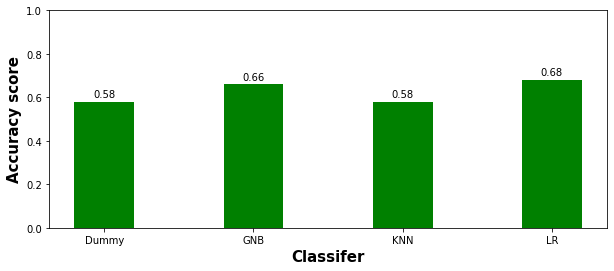

In [165]:
data_ootb_accuracy = {
    'Dummy': max(test_accuracy.values()), 
    'GNB': gnb_accuracy_test, 
    'KNN': kNN_accuracy_test, 
    'LR': LR_accuracy_test, 
}

classifiers = list(data_ootb_accuracy.keys())
values_acc = list(data_ootb_accuracy.values())

fig = plt.figure(figsize = (10, 4))
plt.bar(classifiers, values_acc, color ='g', width = 0.4)

plt.xlabel('Classifer', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy score', fontweight ='bold', fontsize = 15)

plt.ylim(0.0, 1.0) # Set min, max classifier scores
addlabels(classifiers, values_acc)
    
plt.show()

**F1 Diagram**

---

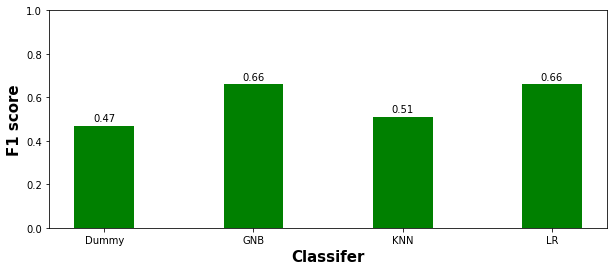

In [215]:
data_ootb_accuracy = {
    'Dummy': np.round(max(test_f1.values()), 2), 
    'GNB': np.round(gnb_f1_test, 2), 
    'KNN': np.round(kNN_f1_test, 2), 
    'LR': np.round(LR_f1_test, 2), 
}

classifiers = list(data_ootb_accuracy.keys())
values_f1 = list(data_ootb_accuracy.values())

fig = plt.figure(figsize = (10, 4))
plt.bar(classifiers, values_f1, color ='g', width = 0.4)

plt.xlabel('Classifer', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 score', fontweight ='bold', fontsize = 15)

plt.ylim(0.0, 1.0) # Set min, max classifier scores
addlabels(classifiers, values_f1)

plt.show()

**Σχολιασμός Επίδοσης Out-of-the-box Αλγορίθμων** <br> <br>
Παρατηρούμε ότι οι ταξινομητές με τις default τιμές για τις παραμέτρους τους, σημειώνουν καλύτερη επίδοση από τους Dummy Classifiers το οποίο σημαίνει πως τα δεδομένα έχουν προετοιμαστεί και επεξεργαστεί σωστά.<br>
 Classifier | Accuracy | f1 score |
| --- | :---: | :---: |
| Dummy | 58 % | 47.2% |
| Gausian Naive Bayes | 66 % | 62.6 % |
| Knn | 58 % | 50.9 % |
| Knn | 68 % | 66.1 % |


Βέβαια η διαφορά δεν είναι μεγάλη και χρειάζεται επιπλέον επεξεργασία των δεδομένων (preprocessing) αλλά και εύρεση των βέλτιστων τιμών των υπερπαραμέτρων των ταξινομητών. Τότε θα παρατηρήσουμε μεγάλη διαφορά στις αποδόσεις των 'έξυπνων' ταξινομητών.



## Optimization
1. Preproccessing
  - Normalization
  - Feature Selection
  - Dataset balancing
2. Pipelines declaration
3. Optimal hyperparameters with grid search and cross-validation 

In [167]:
import optuna
import sklearn
import time 
from optuna.samplers import TPESampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

**Preproccessing**

---

In [168]:
x_train = train_data; y_train = train_targets.values.ravel()
x_test = test_data; y_test = test_targets.values.ravel()

**Normalization**

Θα χρησιμοποιήσουμε τον [Min-Max scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) για να κανονικοποιήσουμε τα δεδομένα μας στα train και test data set από το 0-1 ώστε όλα να έχουν την ίδια επίδραση στην εκπαίδευση του μοντέλου μας.

_(Μπορούμε να χρησιμοποιήσουμε και τον [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), ο οποίος θεωρεί ομαλή κατανομή στις τιμές των χαρακτηριστικών. Ωστόσο εμείς επιλέγουμε τον min-max γιατί δεν επηρεάζει τις binary μεταβλητές)_

In [169]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = MinMaxScaler()
# Train set Normalization 
scaler.fit(train_data)
x_train_normalized = np.round(scaler.transform(train_data), 2)
# Test set Normalization
scaler.fit(test_data)
x_test_normalized = np.round(scaler.transform(test_data), 2)

print(x_test_normalized)

# x_train = x_train_normalized
# x_test = x_test_normalized

[[1.   0.   1.   ... 0.4  0.37 0.19]
 [1.   1.   1.   ... 0.4  0.37 0.19]
 [1.   1.   1.   ... 0.38 0.75 0.45]
 ...
 [1.   1.   1.   ... 0.4  0.37 0.19]
 [1.   1.   1.   ... 0.53 0.98 0.74]
 [0.   1.   0.   ... 0.4  0.37 0.19]]


**Feature Selection**

In [170]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.3)
# Reduce characteristics in Train Set
x_train_reduced = selector.fit_transform(x_train)
# Apply mask to Test Set
mask = selector.get_support()
x_test_reduced = x_test.values[:,mask]

print("Initial characteristics: ", np.shape(train_data)[1])
print("New characteristics: ", np.shape(x_train_reduced)[1])

x_train = x_train_reduced
x_test = x_test_reduced

Initial characteristics:  49
New characteristics:  24


**Dataset balancing**

Χρησιμοποιούμε oversampling στα δεδομένα της μικρότερης κλάσης. Τα αρχικά δεδομένα δεν είναι πολλά οπότε θέλουμε να αποφύγουμε να κάνουμε undersampling στα δεδομένα της μεγαλύτερης κλάσης. Σημειώνεται επίσης, ότι ο λόγος της πληθηκότητας των δύο κλάσεων είναι μικρότερος από 2/3 οπότε δεν περιμένουμε να επηρεάσει αυτό το optimization κατά πολύ τα αποτελέσματά μας.

_Χρησιμοποιήσαμε τον_ [Random Oversampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [171]:
print("Current Dataset Size :")
print("Total: ", np.shape(train_targets)[0])
print("Class 0: ", np.count_nonzero(train_targets == 0))
print("Class 1: ", np.count_nonzero(train_targets == 1))

Current Dataset Size :
Total:  115
Class 0:  44
Class 1:  71


In [172]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)
print("New Dataset Size :")
print("Total: ", np.shape(y_train_res)[0])
print("Class 0: ", np.count_nonzero(y_train_res == 0))
print("Class 1: ", np.count_nonzero(y_train_res == 1))

x_train = x_train_res
y_train = y_train_res

New Dataset Size :
Total:  142
Class 0:  71
Class 1:  71


### Dummy Classifier

Για τον dummy ταξινομητή δεν μπορεί να γίνει κάποια βελτιστοποίηση καθώς οι έξοδοι είναι ανεξάρτητοι της ποιότητας των δεδομένων και χρησιμοποιείται για τον ορισμό ενός κάτω φράγματος όσον αφορά την απόδοση του μοντέλου.

### Gaussian Naive Bayes (GNB) Classifier

**Βελτιστοποίηση βάσει του accuracy score.**

---

In [173]:
# Hyperparameter Optimization using Optuna
def gnb_objective_accuracy(trial):

  scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust'])

  if scalers == "minmax":
        scaler = MinMaxScaler()
  elif scalers == "standard":
        scaler = StandardScaler()
  else:
        scaler = RobustScaler()

  # Hyperparameters setting
  var_smoothing = trial.suggest_float('var_smoothing', 0.5e-9, 2e-9)

  # Pipeline creation
  gnb = GaussianNB(var_smoothing=var_smoothing)
  # Normalization + Model Creation
  gnb_pipeline = make_pipeline(scaler, gnb)

  # Model training with cv
  score = cross_val_score(gnb_pipeline, x_train, y_train, scoring='accuracy', cv = 10, n_jobs = 1)
  return score.mean()

In [174]:
gnb_sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
gnb_study = optuna.create_study(direction="maximize", sampler=gnb_sampler)
gnb_study.optimize(gnb_objective_accuracy, n_trials=180)

[I 2022-11-27 10:25:18,966] A new study created in memory with name: no-name-f80f5a34-5b0f-49ee-aad8-ed1e81f5c367
[I 2022-11-27 10:25:18,997] Trial 0 finished with value: 0.6971428571428571 and parameters: {'scalers': 'standard', 'var_smoothing': 1.397987726295555e-09}. Best is trial 0 with value: 0.6971428571428571.
[I 2022-11-27 10:25:19,023] Trial 1 finished with value: 0.6971428571428571 and parameters: {'scalers': 'minmax', 'var_smoothing': 1.799264218662403e-09}. Best is trial 0 with value: 0.6971428571428571.
[I 2022-11-27 10:25:19,052] Trial 2 finished with value: 0.6971428571428571 and parameters: {'scalers': 'standard', 'var_smoothing': 1.9548647782429917e-09}. Best is trial 0 with value: 0.6971428571428571.
[I 2022-11-27 10:25:19,077] Trial 3 finished with value: 0.6971428571428571 and parameters: {'scalers': 'minmax', 'var_smoothing': 7.751067647801508e-10}. Best is trial 0 with value: 0.6971428571428571.
[I 2022-11-27 10:25:19,105] Trial 4 finished with value: 0.6971428571

In [175]:
optuna.visualization.plot_optimization_history(gnb_study)

In [176]:
print("Best parameters after tuning using mean accuracy:")
gnb_study.best_params

Best parameters after tuning using mean accuracy:


{'scalers': 'standard', 'var_smoothing': 1.397987726295555e-09}

In [177]:
# Use the best hyperparameters to train the model again
best_params = gnb_study.best_params

if best_params['scalers'] == "minmax":
  opt_scaler = MinMaxScaler()
elif best_params['scalers'] == "standard":
  opt_scaler = StandardScaler()
else:
  opt_scaler = RobustScaler()

del best_params['scalers']

# Creation of gnb classifier with optimized parameters
gnb_clf_opt = GaussianNB(**best_params)
gnb_pipeline = make_pipeline(opt_scaler, gnb_clf_opt)

# Kαταγραφή χρόνου train και test
start_time = time.time()

# Model training 
strtfdKFold = StratifiedKFold(n_splits=10)
gnb_pipeline.fit(x_train, y_train)
gnb_accuracy_train = cross_val_score(gnb_pipeline, x_train, y_train, scoring='accuracy' ,cv = strtfdKFold, n_jobs=1)
gnb_f1_train = cross_val_score(gnb_pipeline, x_train, y_train, scoring='f1_macro', cv = strtfdKFold, n_jobs=1)

# Testing
gnb_acc_test = gnb_pipeline.score(x_test, y_test)
gnb_predictions = gnb_pipeline.predict(x_test)
gnb_f1_test = f1_score(y_test, gnb_predictions, average='macro')

# Time's up
print("Συνολικός χρόνος train και test: %s seconds" % (time.time() - start_time))

print("Training Set:")
print("GNB accuracy: ", gnb_accuracy_train.mean())
print("GNB f1: ", gnb_accuracy_train.mean())

print("\nTesting set:")
print("GNB accuracy: ", gnb_acc_test)
print("GNB f1: ", gnb_f1_test)
print('\nGNB Classification Report:\n' + classification_report(y_test, gnb_predictions)+'\n')

# Save the results for the optimization using ACCURACY
gnb_accuracy_ACC = gnb_acc_test
gnb_f1_ACC = gnb_f1_test

Συνολικός χρόνος train και test: 0.06442856788635254 seconds
Training Set:
GNB accuracy:  0.6971428571428571
GNB f1:  0.6971428571428571

Testing set:
GNB accuracy:  0.68
GNB f1:  0.6604414261460102

GNB Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        21
         1.0       0.70      0.79      0.74        29

    accuracy                           0.68        50
   macro avg       0.67      0.66      0.66        50
weighted avg       0.68      0.68      0.67        50




**Βελτιστοποίηση βάσει του f1-macro score.**

---

In [178]:
# Hyperparameter Optimization using Optuna
def gnb_objective_f1(trial):

  # Hyperparameters setting
  scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust'])

  if scalers == "minmax":
        scaler = MinMaxScaler()
  elif scalers == "standard":
        scaler = StandardScaler()
  else:
        scaler = RobustScaler()
        
  var_smoothing = trial.suggest_float('var_smoothing', 0.5e-9, 2e-9)

  # Pipeline Creation
  gnb = GaussianNB(var_smoothing=var_smoothing)
  # Normalization + Model Creation
  gnb_pipeline = make_pipeline(scaler, gnb)

  start_time = time.time()
  # Model training with cv
  score = cross_val_score(gnb_pipeline, x_train, y_train, scoring='f1_macro', cv = 10, n_jobs = 1)
  score_mean = score.mean()
  
  return score_mean

In [179]:
gnb_sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
gnb_study = optuna.create_study(direction="maximize", sampler=gnb_sampler)
gnb_study.optimize(gnb_objective_f1, n_trials=180)

[I 2022-11-27 10:25:26,734] A new study created in memory with name: no-name-afefe617-f200-4291-a119-81a021eaa1be
[I 2022-11-27 10:25:26,772] Trial 0 finished with value: 0.688634487717305 and parameters: {'scalers': 'standard', 'var_smoothing': 1.397987726295555e-09}. Best is trial 0 with value: 0.688634487717305.
[I 2022-11-27 10:25:26,802] Trial 1 finished with value: 0.688634487717305 and parameters: {'scalers': 'minmax', 'var_smoothing': 1.799264218662403e-09}. Best is trial 0 with value: 0.688634487717305.
[I 2022-11-27 10:25:26,836] Trial 2 finished with value: 0.688634487717305 and parameters: {'scalers': 'standard', 'var_smoothing': 1.9548647782429917e-09}. Best is trial 0 with value: 0.688634487717305.
[I 2022-11-27 10:25:26,881] Trial 3 finished with value: 0.688634487717305 and parameters: {'scalers': 'minmax', 'var_smoothing': 7.751067647801508e-10}. Best is trial 0 with value: 0.688634487717305.
[I 2022-11-27 10:25:26,916] Trial 4 finished with value: 0.688634487717305 an

In [180]:
optuna.visualization.plot_optimization_history(gnb_study)

In [181]:
print("Best parameters after tuning using mean accuracy:")
gnb_study.best_params

Best parameters after tuning using mean accuracy:


{'scalers': 'standard', 'var_smoothing': 1.397987726295555e-09}

In [182]:
# Use the best hyperparameters to train the model again
best_params = gnb_study.best_params

if best_params['scalers'] == "minmax":
  opt_scaler = MinMaxScaler()
elif best_params['scalers'] == "standard":
  opt_scaler = StandardScaler()
else:
  opt_scaler = RobustScaler()

del best_params['scalers']

# Creation of gnb classifier with optimized parameters
gnb_clf_opt = GaussianNB(**best_params)
gnb_pipeline = make_pipeline(opt_scaler, gnb_clf_opt)

# Kαταγραφή χρόνου train και test
start_time = time.time()

# Model training 
strtfdKFold = StratifiedKFold(n_splits=10)
gnb_pipeline.fit(x_train, y_train)
gnb_accuracy_train = cross_val_score(gnb_pipeline, x_train, y_train, scoring='accuracy' ,cv = strtfdKFold, n_jobs=1)
gnb_f1_train = cross_val_score(gnb_pipeline, x_train, y_train, scoring='f1_macro', cv = strtfdKFold, n_jobs=1)

# Model Testing
gnb_acc_test = gnb_pipeline.score(x_test, y_test)
gnb_predictions = gnb_pipeline.predict(x_test)
gnb_f1_test = f1_score(y_test, gnb_predictions, average='macro')

# Time's up
print("Συνολικός χρόνος train και test: %s seconds" % (time.time() - start_time))

print("Training Set:")
print("GNB accuracy: ", gnb_accuracy_train.mean())
print("GNB f1: ", gnb_accuracy_train.mean())

print("\nTesting set:")
print("GNB accuracy: ", gnb_acc_test)
print("GNB f1: ", gnb_f1_test)
print('\nGNB Classification Report:\n' + classification_report(y_test, gnb_predictions)+'\n')

# Save the results for the optimization using F1 metric
gnb_accuracy_F1 = gnb_acc_test
gnb_f1_F1 = gnb_f1_test

Συνολικός χρόνος train και test: 0.07065629959106445 seconds
Training Set:
GNB accuracy:  0.6971428571428571
GNB f1:  0.6971428571428571

Testing set:
GNB accuracy:  0.68
GNB f1:  0.6604414261460102

GNB Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        21
         1.0       0.70      0.79      0.74        29

    accuracy                           0.68        50
   macro avg       0.67      0.66      0.66        50
weighted avg       0.68      0.68      0.67        50




### K Nearest Neighbors (KNN)

**Hyperparameter optimization with grid search (using Optuna)**

Στη συνέχεια θα προσπαθήσουμε να βελτιστοποίησουμε τις υπερπαραμέτρους του ταξινομητή μας χρησιμοποιώντας τη βιβλιοθήκη Optuna. Μέσω αυτής θα κάνουμε GridSearch και CV σε 3 κύριες υπερπαραμέτρους του kNN Classifier, τον αριθμό n_neighbors, τα weights και τα metrics.
Χρησιμοποιούμε ακόμα Pipelines για scaling και classification και δοκιμαζουμε τρεις διαφορετικούς scalers για να βρούμε τον καλύτερο.

**Βελτιστοποίηση βάσει του accuracy score.**

---

In [183]:
# Hyperparameter Optimization using Optuna
def kNN_objective(trial):

  # Hyperparameters setting
  scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust'])

  if scalers == "minmax":
        scaler = MinMaxScaler()
  elif scalers == "standard":
        scaler = StandardScaler()
  else:
        scaler = RobustScaler()
        
  n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
  weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
  metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
  # leaf_size = trial.suggest_int('leaf_size', 1, 30)

  # Pipeline Creation for data scaling and classification
  kNN = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, 
                                       weights=weights, 
                                       metric=metric)
  # Normalization + Model Creation
  kNN_pipeline = make_pipeline(scaler, kNN)

  # Model training with cv
  score = cross_val_score(kNN_pipeline, x_train, y_train, scoring='accuracy', cv = 10, n_jobs = 1)
  # score = score.mean()
  return score.mean()

In [184]:
kNN_sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
kNN_study = optuna.create_study(direction="maximize", sampler=kNN_sampler)
kNN_study.optimize(kNN_objective, n_trials=500)

[I 2022-11-27 10:25:35,895] A new study created in memory with name: no-name-3c6d0646-53fe-46d3-84d7-f0ba6dbc6286
[I 2022-11-27 10:25:35,930] Trial 0 finished with value: 0.6709523809523811 and parameters: {'scalers': 'standard', 'n_neighbors': 18, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.6709523809523811.
[I 2022-11-27 10:25:35,987] Trial 1 finished with value: 0.5571428571428572 and parameters: {'scalers': 'robust', 'n_neighbors': 25, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.6709523809523811.
[I 2022-11-27 10:25:36,039] Trial 2 finished with value: 0.7623809523809524 and parameters: {'scalers': 'robust', 'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.7623809523809524.
[I 2022-11-27 10:25:36,071] Trial 3 finished with value: 0.6285714285714286 and parameters: {'scalers': 'standard', 'n_neighbors': 19, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with v

In [185]:
optuna.visualization.plot_optimization_history(kNN_study)

In [186]:
optuna.visualization.plot_param_importances(kNN_study)

Διαπιστώνουμε ότι οι παρακάτω παράμετροι είναι οι βέλτιστες στο training set όταν εκπαιδεύουμε βάσει του accuracy.

In [187]:
print("Best parameters after tuning using mean accuracy:")
kNN_study.best_params

Best parameters after tuning using mean accuracy:


{'scalers': 'standard',
 'n_neighbors': 11,
 'weights': 'distance',
 'metric': 'manhattan'}

Θα χρησιμοποιήσουμε στη συνέχεια τις παραπάνω παραμέτρους για να υπολογίσουμε τα accuracy και f1-macro στο test set.

In [188]:
from sklearn.model_selection import StratifiedKFold
best_params = kNN_study.best_params

if best_params['scalers'] == "minmax":
  opt_scaler = MinMaxScaler()
elif best_params['scalers'] == "standard":
  opt_scaler = StandardScaler()
else:
  opt_scaler = RobustScaler()

del best_params['scalers']

# Creation of knn classifier with optimized parameters
kNN_clf_opt = neighbors.KNeighborsClassifier(**best_params)
kNN_pipeline = make_pipeline(opt_scaler, kNN_clf_opt)

# Kαταγραφή χρόνου train και test
start_time = time.time()

# Model training 
strtfdKFold = StratifiedKFold(n_splits=10)
kNN_pipeline.fit(x_train, y_train)
kNN_scores_acc = cross_val_score(kNN_pipeline, x_train, y_train, scoring='accuracy' ,cv = strtfdKFold, n_jobs=1)
kNN_f1_macro_acc = cross_val_score(kNN_pipeline, x_train, y_train, scoring='f1_macro', cv = strtfdKFold, n_jobs=1)

# Time's up
print("Συνολικός χρόνος train και test: %s seconds" % (time.time() - start_time))

print("Training Set:")
print("kNN accuracy: ", kNN_scores_acc.mean())
print("kNN f1: ", kNN_f1_macro_acc.mean())

kNN_acc_acc = kNN_pipeline.score(x_test, y_test)
kNN_preds_acc = kNN_pipeline.predict(x_test)
knn_f1_acc = f1_score(y_test, kNN_preds_acc, average='macro')

print("\nTesting set:")
print("kNN accuracy: ", kNN_acc_acc)
print("kNN f1 macro: ", knn_f1_acc)
print('\nkNN Classification Report:\n' + classification_report(y_test, kNN_preds_acc)+'\n')

Συνολικός χρόνος train και test: 0.0587766170501709 seconds
Training Set:
kNN accuracy:  0.8333333333333334
kNN f1:  0.832293956043956

Testing set:
kNN accuracy:  0.92
kNN f1 macro:  0.9178981937602627

kNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        21
         1.0       0.93      0.93      0.93        29

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50




**Βελτιστοποίηση βάσει του f1-macro score.**

In [189]:
def kNN_objective(trial):

  #Hyperparameters setting
  scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust'])

  if scalers == "minmax":
        scaler = MinMaxScaler()
  elif scalers == "standard":
        scaler = StandardScaler()
  else:
        scaler = RobustScaler()

  n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
  weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
  metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
  # leaf_size = trial.suggest_int('leaf_size', 1, 30)

  #Pipeline Creation for data scaling and classification
  knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, 
                                       weights=weights, 
                                       metric=metric)
  # Normalization + Model Creation
  pipeline = make_pipeline(scaler, knn)

  #Model training with cv
  score = cross_val_score(pipeline, x_train, y_train, scoring='f1_macro', cv=10, n_jobs=1)
  score = score.mean()
  return score

In [190]:
kNN_sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
kNN_study = optuna.create_study(direction="maximize", sampler=kNN_sampler)
kNN_study.optimize(kNN_objective, n_trials=500)

[I 2022-11-27 10:25:58,517] A new study created in memory with name: no-name-9e3daeb0-9ea1-4c01-8ecb-58381a2694d2
[I 2022-11-27 10:25:58,560] Trial 0 finished with value: 0.660348255975191 and parameters: {'scalers': 'standard', 'n_neighbors': 18, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.660348255975191.
[I 2022-11-27 10:25:58,634] Trial 1 finished with value: 0.524051807325801 and parameters: {'scalers': 'robust', 'n_neighbors': 25, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.660348255975191.
[I 2022-11-27 10:25:58,692] Trial 2 finished with value: 0.7557441904500728 and parameters: {'scalers': 'robust', 'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.7557441904500728.
[I 2022-11-27 10:25:58,736] Trial 3 finished with value: 0.6150520652378237 and parameters: {'scalers': 'standard', 'n_neighbors': 19, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value

In [191]:
optuna.visualization.plot_optimization_history(kNN_study)

In [192]:
optuna.visualization.plot_param_importances(kNN_study)

In [193]:
print("Best parameters after tuning using mean accuracy:")
kNN_study.best_params

Best parameters after tuning using mean accuracy:


{'scalers': 'standard',
 'n_neighbors': 11,
 'weights': 'distance',
 'metric': 'manhattan'}

In [194]:
best_params = kNN_study.best_params

if best_params['scalers'] == "minmax":
  opt_scaler = MinMaxScaler()
elif best_params['scalers'] == "standard":
  opt_scaler = StandardScaler()
else:
  opt_scaler = RobustScaler()

del best_params['scalers']

# Creation of knn classifier with optimized parameters
kNN_clf_opt = neighbors.KNeighborsClassifier(**best_params)
kNN_pipeline = make_pipeline(opt_scaler, kNN_clf_opt)

# Kαταγραφή χρόνου train και test
start_time = time.time()

# Model training 
strtfdKFold = StratifiedKFold(n_splits=10)
# Creation of knn classifier with optimized parameters
clf = neighbors.KNeighborsClassifier(**best_params)
kNN_pipeline = make_pipeline(opt_scaler, clf)

# Model testing
kNN_pipeline.fit(x_train, y_train)
kNN_scores_f1 = cross_val_score(kNN_pipeline, x_train, y_train, scoring='accuracy' ,cv = strtfdKFold, n_jobs=1)
kNN_f1_macro_f1 = cross_val_score(kNN_pipeline, x_train, y_train, scoring='f1_macro', cv = strtfdKFold, n_jobs=1)

# Time's up
print("Συνολικός χρόνος train και test: %s seconds" % (time.time() - start_time))

print("Training Set:")
print("kNN Classifier accuracy: ", kNN_scores_f1.mean())
print("kNN Classifier f1 macro: ", kNN_f1_macro_f1.mean())

knn_test_acc_f1 = kNN_pipeline.score(x_test, y_test)
kNN_preds_f1 = kNN_pipeline.predict(x_test)
knn_f1_f1 = f1_score(y_test, kNN_preds_f1, average='macro')

print("\nTesting set:")
print("kNN Classifier accuracy: ", knn_test_acc_f1)
print("kNN Classifier f1 macro: ", knn_f1_f1)
print('\nkNN Classifier Classification Report:\n' + classification_report(y_test, kNN_preds_f1)+'\n')

Συνολικός χρόνος train και test: 0.056992530822753906 seconds
Training Set:
kNN Classifier accuracy:  0.8333333333333334
kNN Classifier f1 macro:  0.832293956043956

Testing set:
kNN Classifier accuracy:  0.92
kNN Classifier f1 macro:  0.9178981937602627

kNN Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        21
         1.0       0.93      0.93      0.93        29

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50




Με τις βέλτιστες παραμέτρους που προέκυψαν από το optuna υπάρχει βελτίωση και στις 2 μετρικές της τάξης του 5-7% για το training set. Παρατηρούμε για το test set όμως, ότι τόσο το accuracy όσο και το f1-macro score μειώνονται σε σχέση με τα αντίστοιχα του training set, οδηγώντας μας στο να συμπεράνουμε ότι υπάρχει overfitting.

### Logistic Regression (LR)

In [195]:
from sklearn.model_selection import GridSearchCV

logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], #Loss function
    'C' : np.logspace(-1, 1, 40), 
    'solver' : ['lbfgs','newton-cg','liblinear','sag',], #'saga'
    'max_iter' : [100] #100, 500, 1000, 2500, 5000
    }
]
#Cause of warnings (εκτός της μη-σύγκλισης λόγο χαμηλού αριθμού max_iterations)
#solvers :  {'lbfgs', 'newton-cg', 'sag'} support l2 or no Loss function
#solver 'liblinear' supports does not support Elastic net Loss function 

In [196]:
#Accuracy training for Logistic Regression Model

#Searching for the optimal parameters 
with warnings.catch_warnings(record=True): 
  lr_opt_accuracy_train = GridSearchCV(logModel, param_grid = param_grid, cv = 10, verbose=True, scoring='accuracy', n_jobs=-1, )

#Applying the best parameters & Καταγραφή χρόνου train και test
start_time = time.time()
optimised_accuracy_lr_model = lr_opt_accuracy_train.fit(x_train,y_train)

#Evaluating...
predictions_accuracy_model = optimised_accuracy_lr_model.predict(x_test)
optimised_accuracy_lr_model_accuracy_test = optimised_accuracy_lr_model.score(x_test, y_test)

#Time's up
print("Συνολικός χρόνος train και test: %s seconds" % (time.time() - start_time))

Fitting 10 folds for each of 640 candidates, totalling 6400 fits
Συνολικός χρόνος train και test: 143.36900544166565 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


3200 fits failed out of a total of 6400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: 

In [197]:
print("Logistic Regression Model optimised on Accuracy")

# Training set accuracy score
print("Training Set:")
print (f'LR Accuracy - : {optimised_accuracy_lr_model.score(x_train,y_train):.3f}')


# Test set accuracy score and Classification Report
print("\nTest set:")
print("LR accuracy: ", optimised_accuracy_lr_model_accuracy_test)
print('\nLR Classification Report:\n' + classification_report(y_test, LR_predictions)+'\n')

# Best parameters
print(lr_opt_accuracy_train.best_estimator_)
print(lr_opt_accuracy_train.best_params_)

Logistic Regression Model optimised on Accuracy
Training Set:
LR Accuracy - : 0.838

Test set:
LR accuracy:  0.76

LR Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        21
         1.0       0.70      0.79      0.74        29

    accuracy                           0.68        50
   macro avg       0.67      0.66      0.66        50
weighted avg       0.68      0.68      0.67        50


LogisticRegression(C=0.22854638641349906, solver='liblinear')
{'C': 0.22854638641349906, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [199]:
#F1 score training for Logistic Regression Model

#Searching for the optimal parameters 
with warnings.catch_warnings(record=True): 
  lr_opt_f1_macro_train = GridSearchCV(logModel, param_grid = param_grid, cv = 10, verbose=True, scoring='f1_macro', n_jobs=-1, )

#Applying the best parameters & Καταγραφή χρόνου train και test 
start_time = time.time()
optimised_f1_macro_lr_model = lr_opt_accuracy_train.fit(x_train,y_train)

#Evaluating...
predictions_f1_macro_model = optimised_f1_macro_lr_model.predict(x_test)
optimised_f1_macro_lr_model_f1_test = f1_score(y_test, predictions_f1_macro_model, average='macro')


#Time's up
print("Συνολικός χρόνος train και test: %s seconds" % (time.time() - start_time))

Fitting 10 folds for each of 640 candidates, totalling 6400 fits
Συνολικός χρόνος train και test: 144.6497664451599 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


3200 fits failed out of a total of 6400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: 

In [200]:
print("Logistic Regression Model optimised on f1-macro score")

#LR_f1_test = f1_score(y_test, LR_predictions, average='macro')

# Training set f1-macro score
print("Training Set:")
#print("LR f1 macro: ", np.mean(LR_f1_train)) #?????????
print (f'LR f1 macro - : {optimised_f1_macro_lr_model.score(x_train,y_train):.3f}') 

# Test set f1-macro score and Classification Report 
print("\nTest set:")
print("LR f1 macro: ", optimised_f1_macro_lr_model_f1_test)
print('\nLR Classification Report:\n' + classification_report(y_test, LR_predictions)+'\n')

# Best parameters
#print(lr_opt_f1_macro_train.best_estimator_)
#print(lr_opt_f1_macro_train.best_params_)

Logistic Regression Model optimised on f1-macro score
Training Set:
LR f1 macro - : 0.838

Test set:
LR f1 macro:  0.7564935064935064

LR Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        21
         1.0       0.70      0.79      0.74        29

    accuracy                           0.68        50
   macro avg       0.67      0.66      0.66        50
weighted avg       0.68      0.68      0.67        50




## Results and conclusions

| Classifier | Συνολικός χρόνος train και test (sec) | Out-of-the-Box Accuracy | Optimized Accuracy | Out-of-the-Box f1 score | Optimised f1 score |
| --- | :---: | :---: | :---: | :---: | :---: |
| Dummy | - | 58 %  | - | 47.2 % | - |
| Gnb | 0.07 | 66 % | 68 % | 62.6 % | 66 % |
| Knn |  0.056 | 58 % | 92 % | 50.9 % | 91.7 % |
| Ls |  144 | 68 %  | 76 % | 66 % | 75 % |


### Plots & Comparison

In [201]:
#Accuracy Scores and F1-macro scores from our experiments

# [OOTB accuracy, Optimized accuracy]
Dummy_test_acc = [max(test_accuracy.values()), max(test_accuracy.values())]
GNB_test_acc = [gnb_accuracy_test, gnb_accuracy_ACC]
KNN_test_acc = [kNN_accuracy_test, kNN_acc_acc]
LR_test_acc = [LR_accuracy_test, optimised_accuracy_lr_model_accuracy_test] 

barWidth = 0.25

Dummy_test_f1 = [max(test_f1.values()), max(test_f1.values())]
GNB_test_f1 = [gnb_f1_test, gnb_f1_F1]
KNN_test_f1 = [kNN_f1_test, knn_f1_f1]
LR_test_f1 = [LR_f1_test, optimised_f1_macro_lr_model_f1_test]

In [202]:
br1 = np.arange(len(Dummy_test_acc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

**Accuracy Diagram**

---

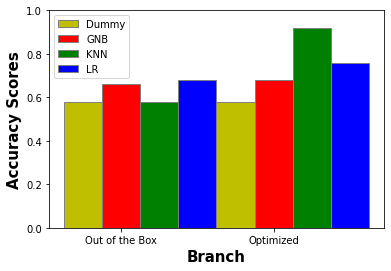

In [203]:
#Test Set Accuracy Scores Plot

barWidth = 0.25
fig = plt.figure()

plt.bar(br1, Dummy_test_acc, color ='y', width = barWidth,
        edgecolor ='grey', label ='Dummy')
plt.bar(br2, GNB_test_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='GNB')
plt.bar(br3, KNN_test_acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br4, LR_test_acc, color ='b', width = barWidth,
        edgecolor ='grey', label ='LR')

plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(GNB_test_acc))],
        ['Out of the Box', 'Optimized'])
 
plt.legend()
plt.ylim(0.0, 1.0) # Set min, max classifier scores
plt.show()

**F1 Diagram**

---

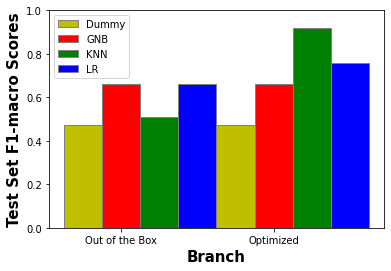

In [204]:
#Test Set F1-macro Scores Plot

barWidth = 0.25
fig = plt.figure()

plt.bar(br1, Dummy_test_f1, color ='y', width = barWidth,
        edgecolor ='grey', label ='Dummy')
plt.bar(br2, GNB_test_f1, color ='r', width = barWidth,
        edgecolor ='grey', label ='GNB')
plt.bar(br3, KNN_test_f1, color ='g', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br4, LR_test_f1, color ='b', width = barWidth,
        edgecolor ='grey', label ='LR')

plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Test Set F1-macro Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(GNB_test_acc))],
        ['Out of the Box', 'Optimized'])
 
plt.legend()
plt.ylim(0.0, 1.0) # Set min, max classifier scores
plt.show()

###Confusion Matrix

---

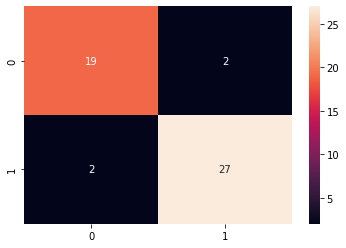

In [210]:
# Confusion Matrix for the best classifier - K Nearest Neighbors 
from sklearn.metrics import confusion_matrix
import seaborn as sns 

mlp_matrix = confusion_matrix(y_test, kNN_preds_acc)
sns.heatmap(mlp_matrix.T, annot = True)

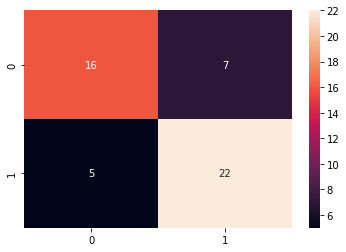

In [211]:
# Confusion Matrix for classifier - Logistic Regression
mlp_matrix = confusion_matrix(y_test, predictions_accuracy_model)
sns.heatmap(mlp_matrix.T, annot = True)

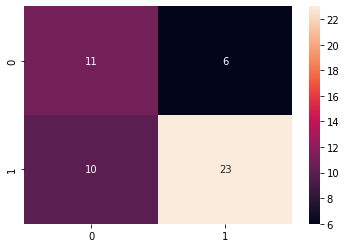

In [214]:
# Confusion Matrix for the worst classifier - Gausian Naive Bayes
mlp_matrix = confusion_matrix(y_test, gnb_predictions)
sns.heatmap(mlp_matrix.T, annot=True)

Παρατηρούμε ότι στο πίνακα σύγχυσης του βέλτιστου ταξινομητή Knn, τα στοιχεία εμφανίζονται κατά 92% στις θέσεις Τrue Positive ή True Negative. <br>
Όμως για τον ταξινομητή Gnb, ο οποίος είναι ο χειρότερος για το dataset αυτό, παρατηρούμε ότι το ποσοστό αυτό στο 68%.  <br><br>

Επειδή το σύνολο δεδομένων που εξετάζουμε αφορά το Υποκυτταρικό καρκίνωμα και η ερώτηση που τίθεται να απαντήση ο ταξινομητής είναι ιατρικής φύσης, θέλουμε να αποφύγουμε τα False Positive* στοιχεία καθώς ισχύει :  <br>   

Αποτελέσματα :    
$\;\;\;\;\;\;$   1 - > Ο ασθενής έζησε - positive <br>
$\;\;\;\;\;\;$   0 - > O ασθενής απεβίωσε - negative <br>

*(Οι Boolean τιμές είναι ανάποδα από τις σύνηθες ιατρικές τιμές που χρησιμοποιούνται. Όπως για παράδειγμα στο τεστ covid όπου θετικό(1) σημαίνει ότι ο ασθενής έχει τον ιό, ενώ αρνητικό ότι είνα υγιής)

Ο βέλτιστος ταξινομητής για το συγκεκριμένο σύνολο δεδομένων και την χρήση του δεν πρέπει να εμφανίζει False Positive καθώς με αυτό τον τρόπο ο ασθενής θα θεωρείτε με λανθασμένη πρόβλεψη πως θα είναι υγιής ενώ στην πραγματικότητα θα αποβιώσει.  

Άρα με αυτή την σκοπιά παρατηρούμε ότι ο Knn παραμένει ο καλύτερος ταξινομητής. Στην περίπτωση του χειρότερου ταξινομητή, παρόλο ότι ο Lr ταξινομητής είναι overall καλύτερος από τον Gnb, στην περίπτωση των false positive δεδομένων είναι ο χειρότερος από όλους.


# Συμπεράσματα


**Συμπεραίνουμε ότι ο καλύτερος ταξινομητής και αυτός ο οποίος προτείνουμε για το συγκεκριμένο σύνολο δεδομένων είναι το K Nearest Neighbors.**

Η απόδοση του στο test set είναι πολύ καλύτερη σε όλες τις μετρικές. Ταυτόχρονα εμφανίζει τον μικρότερο αριθμό false positive στοιχείων και αυτό τον καθιστά τον καλύτερο ταξινομητή για την συγκεκριμένη ιατρική εφααρμογή. 

Η καλή απόδοση του Knn μπορεί να ερμηνευτεί από την μορφή των δεδομένων. Είναι πιθανόν τα δεδομένα να εμφανίζουν μια συγκεκριμένη ομαδοποίηση τέτεια ώστε ο αλγόριθμος να μπορεί να τα διαχωρίσει τα δεδομένα σε σαφής ξεχωριστές ομάδες χωρίς να υπάρχουν πολλά conflicts μεταξύ τους.<br>

Για το χειρότερο overall ταξινομητή Gnb, θα μπορούσαμε να πούμε πως τα δεδομένα δεν είναι ανεξάρτητα μεταξύ τους και έτσι δεν μπορεί να δουλέψει σωστά ο Naive Bayes αλγόριθμος. Ιατρικές μετρήσεις και εξετάσεις ενός ανθρώπου δεν γίνεται να είναι ανεξάρτητες μεταξύ τους καθώς όλες γίνονται στο ίδιο οργανισμό. Έτσι, επειδή δεν εξασφαλίζεται η ανεξαρτησία ο αλγόριθμος δεν μπορεί να δουλέψει σωστά.
